### Продвинутое машинное обучение: 
## Домашнее задание 2

Второе домашнее задание — самое большое в курсе, в нём придётся и концептуально подумать о происходящем, и технические трудности тоже порешать. Как и раньше, в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Как всегда, любые комментарии, новые идеи и рассуждения на тему категорически приветствуются. 

Второе задание — это полноценный проект по анализу данных, начиная от анализа постановки задачи и заканчивая сравнением результатов разных моделей. Задача реальная и серьёзная, хотя тему я выбрал развлекательную: мы будем строить вероятностную рейтинг-систему для спортивного “Что? Где? Когда?” (ЧГК).

Background: в спортивном “Что? Где? Когда?” соревнующиеся команды отвечают на одни и те же вопросы. После минуты обсуждения команды записывают и сдают свои ответы на карточках; побеждает тот, кто ответил на большее число вопросов. Турнир обычно состоит из нескольких десятков вопросов (обычно 36 или 45, иногда 60, больше редко). Часто бывают синхронные турниры, когда на одни и те же вопросы отвечают команды на сотнях игровых площадок по всему миру, т.е. в одном турнире могут играть сотни, а то и тысячи команд. Соответственно, нам нужно:
построить рейтинг-лист, который способен нетривиально предсказывать результаты будущих турниров;
при этом, поскольку ЧГК — это хобби, и контрактов тут никаких нет, игроки постоянно переходят из команды в команду, сильный игрок может на один турнир сесть поиграть за другую команду и т.д.; поэтому единицей рейтинг-листа должна быть не команда, а отдельный игрок;
а что сильно упрощает задачу и переводит её в область домашних заданий на EM-алгоритм — это характер данных: начиная с какого-то момента, в базу результатов начали вносить все повопросные результаты команд, т.е. в данных будут записи вида “какая команда на какой вопрос правильно ответила”.
Я сделал за вас только первый шаг: выкачал через API сайта рейтинга ЧГК все нужные данные, чтобы сайт не прилёг под вашими многочисленными скрейперами. :) Полученные данные лежат в формате pickle вот здесь:
https://www.dropbox.com/s/s4qj0fpsn378m2i/chgk.zip 

1. Прочитайте и проанализируйте данные, выберите турниры, в которых есть данные о составах команд и повопросных результатах (поле mask в results.pkl). Для унификации предлагаю:
    взять в тренировочный набор турниры с dateStart из 2019 года; 
    в тестовый — турниры с dateStart из 2020 года.
2. Постройте baseline-модель на основе линейной или логистической регрессии, которая будет обучать рейтинг-лист игроков. Замечания и подсказки:
    
    повопросные результаты — это фактически результаты броска монетки, и их предсказание скорее всего имеет отношение к бинарной классификации;
    
    в разных турнирах вопросы совсем разного уровня сложности, поэтому модель должна это учитывать; скорее всего, модель должна будет явно обучать не только силу каждого игрока, но и сложность каждого вопроса;
    
    для baseline-модели можно забыть о командах и считать, что повопросные результаты команды просто относятся к каждому из её игроков.
3. Качество рейтинг-системы оценивается качеством предсказаний результатов турниров. Но сами повопросные результаты наши модели предсказывать вряд ли смогут, ведь неизвестно, насколько сложными окажутся вопросы в будущих турнирах; да и не нужны эти предсказания сами по себе. Поэтому:

    предложите способ предсказать результаты нового турнира с известными составами, но неизвестными вопросами, в виде ранжирования команд;

    в качестве метрики качества на тестовом наборе давайте считать ранговые корреляции Спирмена и Кендалла (их можно взять в пакете scipy) между реальным ранжированием в результатах турнира и предсказанным моделью, усреднённые по тестовому множеству турниров.

4. Теперь главное: ЧГК — это всё-таки командная игра. Поэтому:

    предложите способ учитывать то, что на вопрос отвечают сразу несколько игроков; скорее всего, понадобятся скрытые переменные; не стесняйтесь делать упрощающие предположения, но теперь переменные “игрок X ответил на вопрос Y” при условии данных должны стать зависимыми для игроков одной и той же команды;
    
    разработайте EM-схему для обучения этой модели, реализуйте её в коде;

    обучите несколько итераций, убедитесь, что целевые метрики со временем растут (скорее всего, ненамного, но расти должны), выберите лучшую модель, используя целевые метрики.

5. А что там с вопросами? Постройте “рейтинг-лист” турниров по сложности вопросов. Соответствует ли он интуиции (например, на чемпионате мира в целом должны быть сложные вопросы, а на турнирах для школьников — простые)? Если будет интересно: постройте топ сложных и простых вопросов со ссылками на конкретные записи в базе вопросов ЧГК (это чисто техническое дело, тут никакого ML нету).

6. Бонус: постройте топ игроков по предсказанной вашей моделью силе игры, а рядом с именами игроков напишите общее число вопросов, которое они сыграли. Скорее всего, вы увидите, что топ занят игроками, которые сыграли совсем мало вопросов, около 100 или даже меньше; если вы поищете их в официальном рейтинге ЧГК, вы увидите, что это какие-то непонятные ноунеймы. В baseline-модели, скорее всего, такой эффект будет гораздо слабее.

Это естественное свойство модели: за счёт EM-схемы влияние 1-2 удачно сыгранных турниров будет только усиливаться, потому что неудачных турниров, чтобы его компенсировать, у этих игроков нет. Более того, это не мешает метрикам качества, потому что если эти игроки сыграли всего 1-2 турнира в 2019-м, скорее всего они ничего или очень мало сыграли и в 2020, и их рейтинги никак не влияют на качество тестовых предсказаний. Но для реального рейтинга такое свойство, конечно, было бы крайне нежелательным. Давайте попробуем его исправить:
    
    сначала жёстко: выберите разумную отсечку по числу вопросов, учитывая, что в одном турнире их обычно 30-50;

    можно ли просто выбросить игроков, которые мало играли, и переобучить модель? почему? предложите, как нужно изменить модель, чтобы не учитывать слишком мало сыгравших, и переобучите модель;
    
    но всё-таки это не слишком хорошее решение: если выбрать маленькую отсечку, будут ноунеймы в топе, а если большую, то получится, что у нового игрока слишком долго не будет рейтинга; скорее всего, никакой “золотой середины” тут не получится;
    
    предложите более концептуальное решение для топа игроков в рейтинг-листе; если получится, реализуйте его на практике (за это уж точно будут серьёзные бонусные баллы).

7. Бонус: игроки со временем учатся играть лучше (а иногда бывает и наоборот). А в нашей модели получается, что первые неудачные турниры новичка будут тянуть его рейтинг вниз всю жизнь — это нехорошо, рейтинг должен быть достаточно гибким и иметь возможность меняться даже у игроков, отыгравших сотни турниров. Давайте попробуем этого добиться:

    если хватит вычислительных ресурсов, сначала сделайте baseline совсем без таких схем, обучив рейтинги на всех турнирах с повопросными результатами, а не только на турнирах 2019 года; улучшилось ли качество предсказаний на 2020?
    
    одну схему со временем мы уже использовали: брали для обучения только последний год турниров; примерно так делают, например, в теннисной чемпионской гонке; у этой схемы есть свои преимущества, но есть и недостатки (например, достаточно мало играть год, чтобы полностью пропасть из рейтинга);
    
    предложите варианты базовой модели или алгоритма её обучения, которые могли бы реализовать изменения рейтинга со временем; если получится, реализуйте их на практике, проверьте, улучшатся ли предсказания на 2020.

## 1. Подготовка данных

In [1]:
from datetime import datetime
from pprint import pprint
from typing import List, Dict
import pickle

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import kendalltau, spearmanr
from tqdm import tqdm
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Загружаем данные
with open('chgk/results.pkl', 'rb') as file:
    all_results = pickle.load(file)
    
with open('chgk/tournaments.pkl', 'rb') as file:
    all_tournaments = pickle.load(file)
    
with open('chgk/players.pkl', 'rb') as file:
    all_players = pickle.load(file)

In [3]:
results_with_mask = {}

for k, v in all_results.items():
    if len(v) > 0:
        try:
            if v[0]['mask'] is not None and v[0]['teamMembers'] != []:
                results_with_mask[k] = v
        except KeyError:
            pass
print(f'Изначально было {len(all_results.keys())} турниров, оставили {len(results_with_mask.keys())} с масками')

Изначально было 5528 турниров, оставили 3652 с масками


In [4]:
# Возьмём теперь данные только для 2019 в качестве train, для 2020 - в качестве test.
YEAR_FOR_TRAIN = 2019
YEAR_FOR_TEST = 2020
train_results = {}
test_results = {}

for k, v in results_with_mask.items():
    tournament_date = datetime.fromisoformat(all_tournaments[k]['dateStart'])
    if tournament_date.year == YEAR_FOR_TRAIN:
        train_results[k] = v
    elif tournament_date.year == YEAR_FOR_TEST:
        test_results[k] = v
print(f'Получилось {len(train_results.keys())} турниров в 2019 году (train) и {len(test_results.keys())} в 2020 году (test)')

Получилось 674 турниров в 2019 году (train) и 173 в 2020 году (test)


# 2. Применение логрега 

Постройте baseline-модель на основе линейной или логистической регрессии, которая будет обучать рейтинг-лист игроков. Замечания и подсказки:
    
    повопросные результаты — это фактически результаты броска монетки, и их предсказание скорее всего имеет отношение к бинарной классификации;
    
    в разных турнирах вопросы совсем разного уровня сложности, поэтому модель должна это учитывать; скорее всего, модель должна будет явно обучать не только силу каждого игрока, но и сложность каждого вопроса;
    
    для baseline-модели можно забыть о командах и считать, что повопросные результаты команды просто относятся к каждому из её игроков.

Положим, что $p(X)$ -- рейтинг игрока $X$ (вероятность игрока ответить на какой-то вопрос). Распишем теперь $p(X)$: $p(X) = \int_Q p(X, Q=q) dq $ - рейтинг игрока, рассчитываемый по множеству всех вопросов $Q$, на которые он пытался отвечать. Здесь мы ввели характеристику сложности вопросов $q$; её можно интерпетировать как долю команд, которые правильно ответили на данные вопрос. Тогда итоговые формулы приобретут вид:

$$p(X) = \int_Q p(X|Q=q) p(Q=q) dq,$$ $$p(Q=q) = \frac{N_{correct}}{N_{correct+incorrect}}.$$

Фактически здесь наша модель -- $P(X|Q=q)$ -- её будем обучать для каждого игрока. 

### Важное замечание
В отдельных турнирах нашлись команды, у которых длина маски ответов немного меньше, чем длина маски у других командах. Мне кажется, это произошло из-за того, что команда не прошла в следующий тур игры (не знаю, есть ли такое в ЧГК, но предположить такое мне кажется разумным. А потому, если длина у команды для данного турнира меньше максимально возможной для данного турнира, будем считать, что команда просто не отвечала на те вопросы. 

Иными словами, будем дополнять маски нулями до максимальной длины. 

In [5]:
def form_question_id(tournament_id: int, question_num: int) -> int:
    return 1000 * tournament_id + question_num


def define_mask_len(teams: Dict[str, str]) -> int:
    '''
    Будем считать, что если маска None, то просто пропустим такую
    '''
    mask_len = 0
    for team in teams:
        if team['mask'] is not None:
            mask_len = max(mask_len, len(team['mask']))
    return mask_len


def form_question_complexity(results: Dict[str, list]) -> Dict[int, float]:
    '''
    Здесь будем считать сложность вопросов. 
    '''
    ans_dict = {}
    for tournament_id, teams in results.items():
        teams_number = len(teams)
        mask_len = define_mask_len(teams)
        question_complexity = [0] * mask_len
        for team in teams:
            mask = team['mask']
            if mask is None:
                mask = ['0'] * mask_len
            for i, m_i in enumerate(mask):
                if m_i not in ['0', '1']:
                    mask_i = 0
                else:
                    mask_i = int(m_i)
                question_complexity[i] += mask_i
        question_complexity = [q / teams_number for q in question_complexity]
        for q_i, q in enumerate(question_complexity):
            ans_dict[form_question_id(tournament_id, q_i)] = 1 - q
    return ans_dict


question_compl_train = form_question_complexity(train_results)
question_compl_test = form_question_complexity(test_results)

Построим распределение для Q.

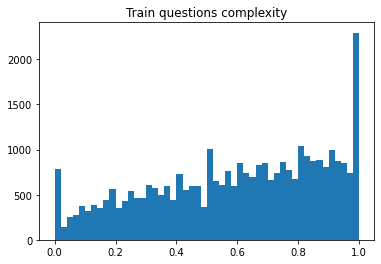

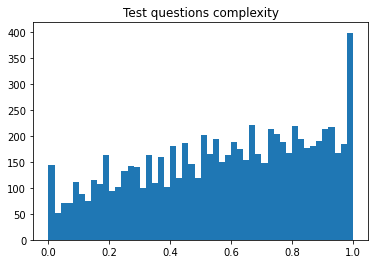

In [6]:
plt.hist(question_compl_train.values(), bins=50)
plt.title('Train questions complexity')
plt.show()
plt.hist(question_compl_test.values(), bins=50)
plt.title('Test questions complexity')
plt.show()

In [7]:
def get_players_question(results: Dict[str, list]) -> pd.DataFrame:
    '''
    Эта функция из сырых данных будет формировать таблицу, состоящую из колонок:
    - team_id
    - tournamennt_id
    - question_id
    - player_id
    - question_complexity
    - bool_ans
    Каждая строка таблицы содержит результат ответа каждого игрока на вопрос. При этом каждому игроку 
    добавляется 1, если команда ответила положительно, иначе 0.
    '''
    ans_dict = {
        'team_id': [], 
        'tournament_id': [],
        'question_id': [], 
        'player_id': [],
        'question_complexity': [],
        'bool_ans': []
    }
    question_complexity = form_question_complexity(results)
    for tournament_id, teams in results.items():
        teams_number = len(teams)
        mask_len = define_mask_len(teams)
        for team in teams:
            team_id = team['team']['id']
            for member in team['teamMembers']:
                team_member_id = member['player']['id']
                if team['mask'] is not None:
                    team_mask = team['mask']
                else:
                    team_mask = '0' * mask_len
                for q_i in range(mask_len):
                    if q_i < len(team_mask):
                        if team_mask[q_i] not in ['0', '1']:
                            bool_ans = 0
                        else:
                            bool_ans = int(team_mask[q_i])
                    else:
                        bool_ans = 0
                    quest_id = form_question_id(tournament_id, q_i)
                    
                    ans_dict['team_id'].append(team_id)
                    ans_dict['tournament_id'].append(tournament_id)
                    ans_dict['question_id'].append(quest_id)
                    ans_dict['player_id'].append(team_member_id)
                    ans_dict['question_complexity'].append(question_complexity[quest_id])
                    ans_dict['bool_ans'].append(bool_ans)
    
    return pd.DataFrame.from_records(data=ans_dict)

In [8]:
train_df = get_players_question(train_results)
print(train_df.shape)
train_df.head()

(25533186, 6)


,bool_ans,player_id,question_complexity,question_id,team_id,tournament_id
0,1,6212,0.116883,4772000,45556,4772
1,1,6212,0.220779,4772001,45556,4772
2,1,6212,0.554113,4772002,45556,4772
3,1,6212,0.480519,4772003,45556,4772
4,1,6212,0.121212,4772004,45556,4772


In [9]:
test_df = get_players_question(test_results)
print(test_df.shape)
test_df.head()

(4809049, 6)


,bool_ans,player_id,question_complexity,question_id,team_id,tournament_id
0,1,30152,0.717391,4957000,49804,4957
1,1,30152,0.880435,4957001,49804,4957
2,1,30152,0.141304,4957002,49804,4957
3,1,30152,0.423913,4957003,49804,4957
4,1,30152,0.739130,4957004,49804,4957


Теперь обучим для каждого игрока логистическую регрессию $P(X|q=Q)$, где как признаки будем рассматривать вектор, состоящий из сложностей вопросов, на которые ответил игрок, а в качестве метки класса - результат ответа игрока на вопрос (ответил или не ответил, то есть 0 или 1).

$$P(X|Q=q) = \sigma(\omega q + \omega_0)$$

Тогда рейтинг $P(X)$, согласно формуле $p(X) = \int_Q p(X|Q=q) p(Q=q) dq,$ будет интеграл, взятый по всем вопросам. Для построения распределения $P(Q=q)$ воспользуемся гистограммой распределения, приведённой выше. 

In [10]:
def count_complexity(question_complexities: List[float], bins_number: int = 100) -> List[float]:
    num_complexity = len(question_complexities)
    hist = np.histogram(question_complexities, bins=bins_number)
    points_distr_in_bins = hist[0] / num_complexity
    complex_x_space = np.empty((hist[1].shape[0] - 1))
    for i in range(bins_number):
        complex_x_space[i] = (hist[1][i] + hist[1][i + 1]) / 2
    return complex_x_space, points_distr_in_bins

In [11]:
compl_train_space, question_compl_train_distr = count_complexity(list(question_compl_train.values()))
_, question_compl_test_distr = count_complexity(list(question_compl_test.values()))

In [ ]:
# Теперь обучим модели для каждого игрока
players_rating = {}
players_unique_ids = list(train_df['player_id'].unique())
print(f'В тренировочной выборке всего {len(players_unique_ids)} игроков')

for player_id in tqdm(players_unique_ids):
    current_data = train_df[train_df['player_id'] == player_id]
    current_data_x = current_data['question_complexity'].to_numpy()
    current_data_y = current_data['bool_ans'].to_numpy()
    
    # Некоторые команды не ответили ни на один вопрос (или ответили на все).
    # Такие случаи одного класса надо обрабатывать отдельно. 
    if np.sum(current_data_y) == 0:
        players_rating[player_id] = 0.
    elif np.sum(current_data_y) == current_data_y.shape[0]:
        players_rating[player_id] = 1.
    else:
        model = LogisticRegression()
        model.fit(current_data_x.reshape(-1, 1), current_data_y)
        preds = model.predict_proba(compl_train_space.reshape(-1, 1))[:, 1]
        players_rating[player_id] = np.dot(preds, question_compl_train_distr)

  0%|          | 0/59102 [00:00<?, ?it/s]

В тренировочной выборке всего 59102 игроков


 16%|█▌        | 9174/59102 [05:04<29:41, 28.03it/s]  

In [ ]:
# Чем больше рейтинг, тем лучше играет игрок. 
plt.hist(players_rating.values(), 100)
plt.title('Рейтинг игроков')
plt.ylabel('Количество игроков с данным рейтингом')
plt.xlabel('Рейтинг игрока')
plt.show()

Видно, что распределение имеет такой вид, что у большинства игроков рейтинг лежит где-то посередине. 

In [ ]:
# Выведем 20 чамых лучших игроков за 2019 год. 
ans_dict = {'player_name': [], 'player_rating': []}
for (player_id, player_rating) in sorted(players_rating.items(), key=lambda x: x[1], reverse=True)[:20]:
    ans_dict['player_name'].append(all_players[player_id]['name'] + ' ' + all_players[player_id]['patronymic'] + ' ' + all_players[player_id]['surname'])
    ans_dict['player_rating'].append(player_rating)
pd.DataFrame.from_records(ans_dict)

# 3
Качество рейтинг-системы оценивается качеством предсказаний результатов турниров. Но сами повопросные результаты наши модели предсказывать вряд ли смогут, ведь неизвестно, насколько сложными окажутся вопросы в будущих турнирах; да и не нужны эти предсказания сами по себе. Поэтому:

предложите способ предсказать результаты нового турнира с известными составами, но неизвестными вопросами, в виде ранжирования команд;

в качестве метрики качества на тестовом наборе давайте считать ранговые корреляции Спирмена и Кендалла (их можно взять в пакете scipy) между реальным ранжированием в результатах турнира и предсказанным моделью, усреднённые по тестовому множеству турниров.

Если вероятность игроком $X_i$ правильно ответить на вопрос $P(X_i)$, то вероятность не ответить на вопрос -- $1-P(X_i)$. Тогда вероятность участников команды $T$ не ответить на вопрос равна произведению этих вероятностей $\prod_{X_i \in T} \left( 1 - P(X_i) \right)$, в таком случае вероятность правильно ответить на вопрос (рейтинг команды) равна $$\prod_{X_i \in T} \left( 1 - P(X_i) \right).$$


In [ ]:
def rate_team(team: Dict[str, str], players_rating: Dict[int, float], p_mean: float) -> float:
    ans = 1
    for player in team['teamMembers']:
        player_id = player['player']['id']
        if player_id in players_rating.keys():
            p = players_rating[player_id]
        else:
            p = p_mean
        ans *= (1 - p)
    return 1 - ans

In [ ]:
kendaltau_s = []
spearman_s = []

# Если игрока нет в рейтинге, то присвоим ему средний рейтинг.
p_mean = np.mean(list(players_rating.values()))

for tournament_id, teams in test_results.items():
    my_team_rating = np.empty_like(teams)
    real_places = np.empty_like(my_team_rating)
    for i, team in enumerate(teams):
        my_team_rating[i] = rate_team(team, players_rating, p_mean)
        real_places[i] = team['position']
    
    my_team_places = np.argsort(my_team_rating)[::-1]
    kendalltau_i = kendalltau(my_team_places, real_places)[0]
    spearmanr_i = spearmanr(my_team_places, real_places)[0]
    if not np.isnan(kendalltau_i) and not np.isnan(spearmanr_i):
        kendaltau_s.append(kendalltau_i)
        spearman_s.append(spearmanr_i)

print(f'Средняя корреляция Спирмана {np.mean(spearman_s)}, средняя корреляция Кендалла {np.mean(kendaltau_s)}.')

# 4
Теперь главное: ЧГК — это всё-таки командная игра. Поэтому:

    предложите способ учитывать то, что на вопрос отвечают сразу несколько игроков; скорее всего, понадобятся скрытые переменные; не стесняйтесь делать упрощающие предположения, но теперь переменные “игрок X ответил на вопрос Y” при условии данных должны стать зависимыми для игроков одной и той же команды;
    
    разработайте EM-схему для обучения этой модели, реализуйте её в коде;

    обучите несколько итераций, убедитесь, что целевые метрики со временем растут (скорее всего, ненамного, но расти должны), выберите лучшую модель, используя целевые метрики.

